In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
df.rename(columns={'patientid':'ID'},inplace=True)
gender = {0: 'Female', 1: 'Male'}
df['gender'] = df['gender'].replace(gender)
df

,ID,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,Male,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,Male,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,Male,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,Male,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,Male,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,Male,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,Male,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,Male,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,Male,1,186,417,0,1,117,1,5.9,3,2,1


In [4]:
df.isna().sum()

ID                   0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [5]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   object 
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 109.5+ KB


In [7]:

df.describe(include='all')


,ID,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.048704e+06,49.24200,NaN,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,NaN,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,NaN,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,NaN,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,NaN,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,NaN,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000


# EDA

In [8]:
print(df['chestpain'].unique())
print(df['chestpain'].value_counts())
chest = {
    0: "typical angina",
    1: "atypical angina",
    2: "non-anginal pain",
    3: "asymptomatic"
}

[2 0 1 3]
0    420
2    312
1    224
3     44
Name: chestpain, dtype: int64


In [9]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


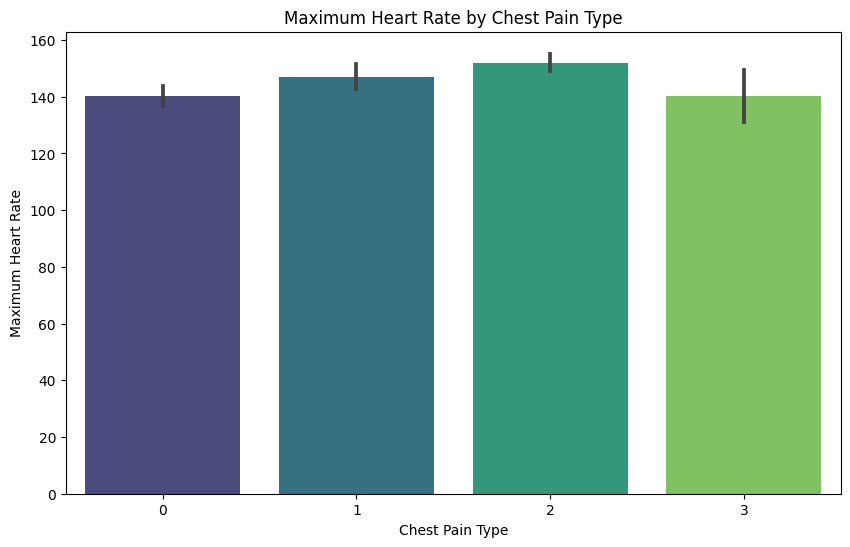

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

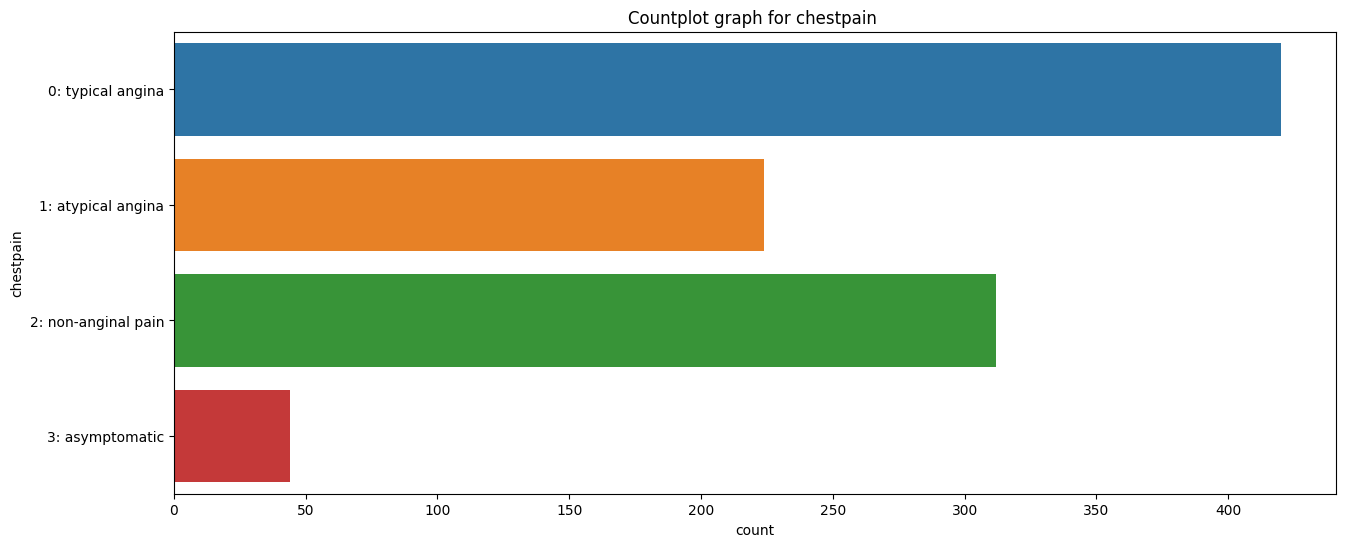

In [16]:
def countplot(data, hue=None, column_x=None, column_y=None, order=None, order_hue=None, saturation=1.0, label_dict=None):

    plt.figure(figsize=(15, 6))

    if column_x and column_y:
        raise ValueError("Specify either column_x or column_y")

    elif column_x:
        plt.title(f'Countplot graph for {column_x} ')
        sns.countplot(x=column_x, hue=hue, data=data, order=order, hue_order=order_hue, saturation=saturation)

        if order is not None and label_dict is not None:
            plt.xticks(ticks=range(len(order)), labels=[f'{i}: {label_dict[val]}' for i, val in enumerate(order)])

    elif column_y:
        plt.title(f'Countplot graph for {column_y} ')
        sns.countplot(y=column_y, hue=hue, data=data, order=order, hue_order=order_hue, saturation=saturation)

        if order is not None and label_dict is not None:
            plt.yticks(ticks=range(len(order)), labels=[f'{i}: {label_dict[val]}' for i, val in enumerate(order)])


    else:
        sns.countplot(x=None, y=None, hue=hue, data=data, order=order, hue_order=order_hue, saturation=saturation)

    plt.show()

countplot(data=df, column_y='chestpain', order=sorted(df['chestpain'].unique()), saturation=0.8, label_dict=chest)


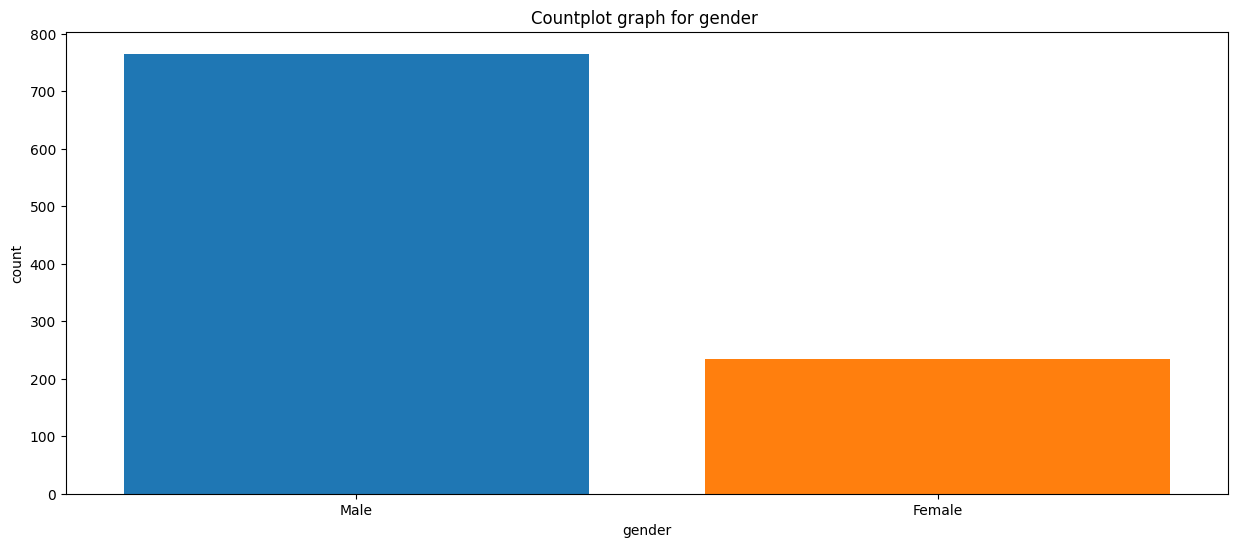

In [23]:
countplot(data=df,column_x='gender')


<Figure size 2000x1200 with 0 Axes>

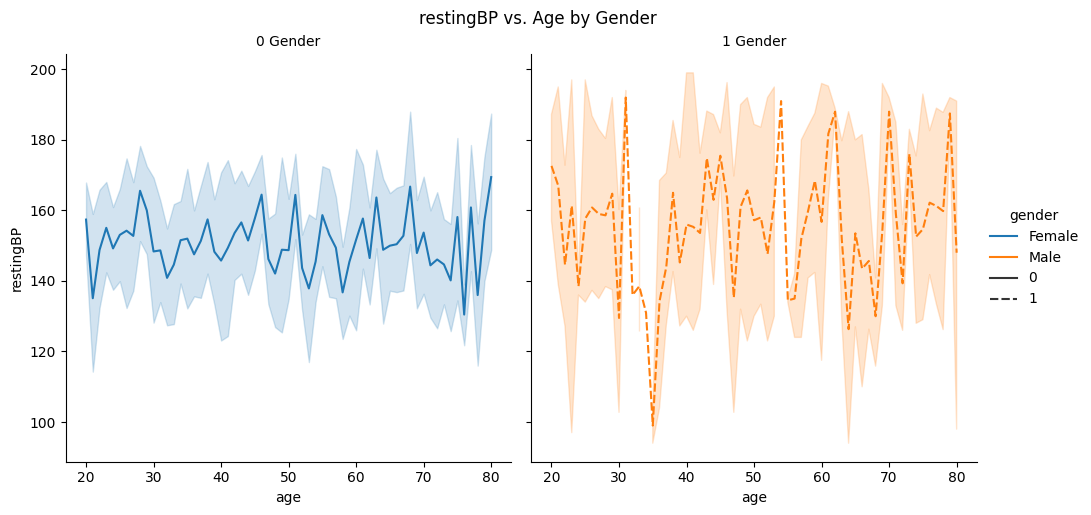

<Figure size 2000x1200 with 0 Axes>

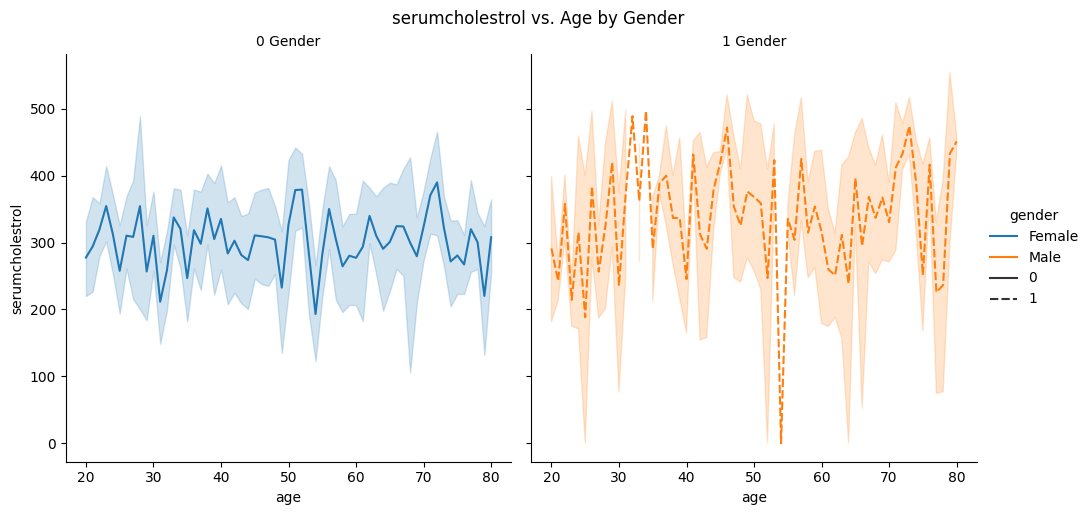

<Figure size 2000x1200 with 0 Axes>

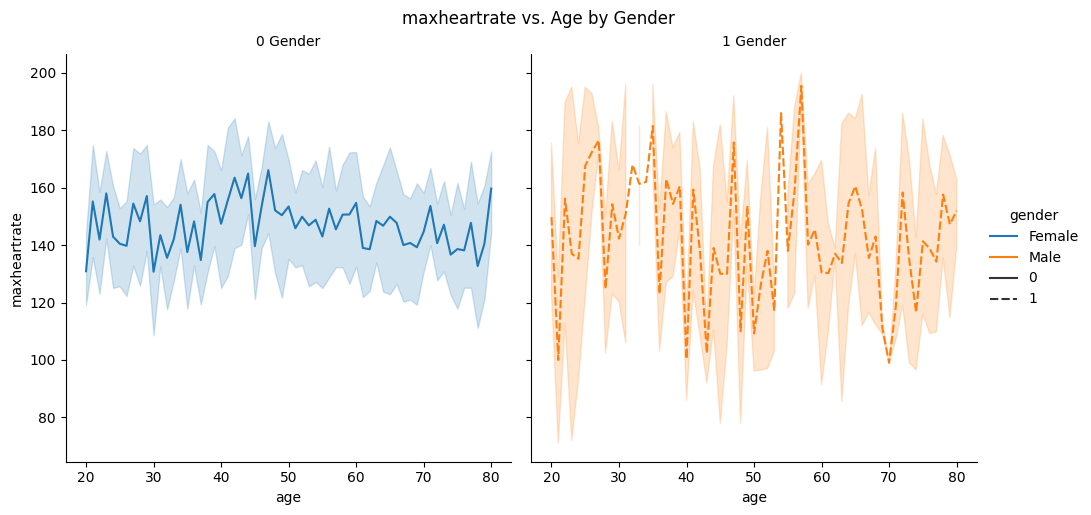

<Figure size 2000x1200 with 0 Axes>

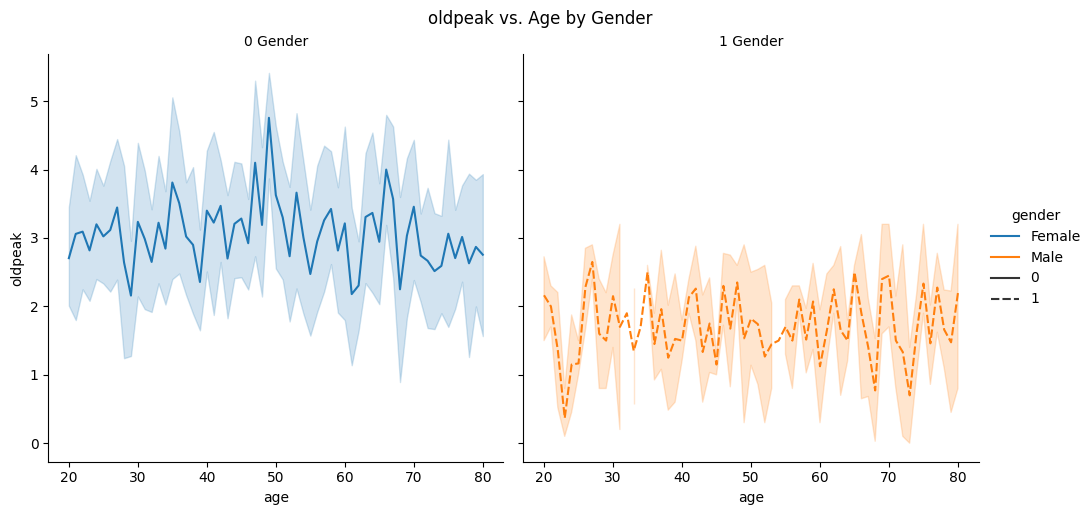

In [29]:
numeric_cols=['restingBP','serumcholestrol','maxheartrate','oldpeak']
for i in numeric_cols:

    plt.figure(figsize=(20,12))
    plot=sns.relplot(data=df, x='age', y=i, kind='line', hue=df['gender'].map(gender), style='gender',col='gender')
    plot.set_titles("{col_name} Gender")

    plt.suptitle(f"{i} vs. Age by Gender", y=1.02)

    plt.show()


In [30]:
df.fastingbloodsugar.nunique()

2

In [31]:
df.fastingbloodsugar.value_counts()

0    704
1    296
Name: fastingbloodsugar, dtype: int64

In [41]:
df.rename(columns={'patientid':'ID'},inplace=True)
gender = {0: 'Female', 1: 'Male'}
df['gender'] = df['gender'].replace(gender)


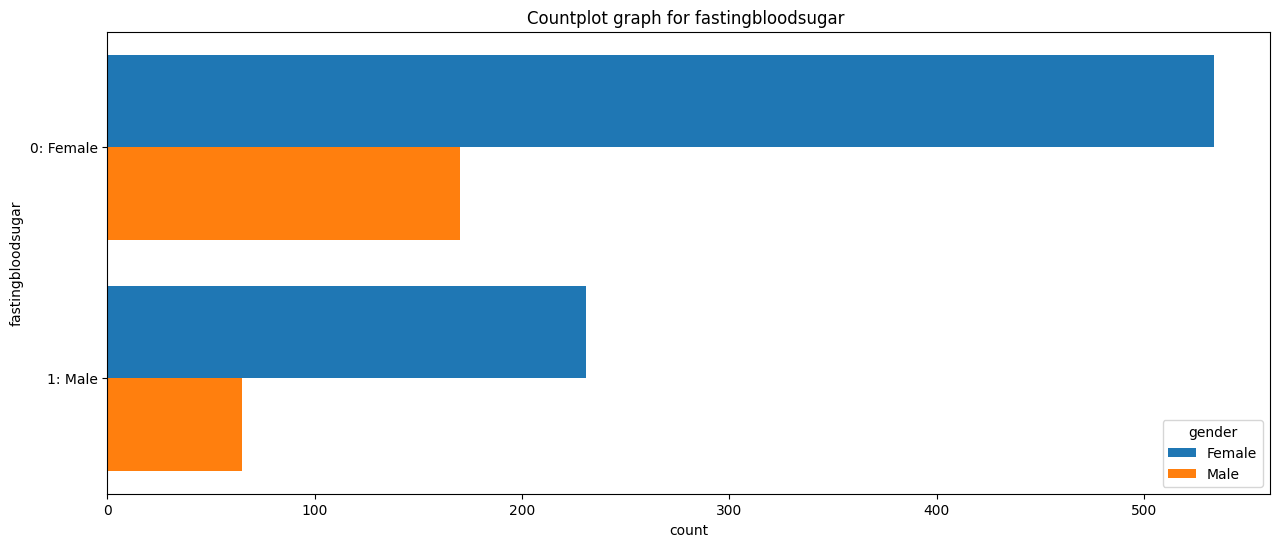

In [43]:

countplot(data=df, column_y='fastingbloodsugar', order=df['fastingbloodsugar'].unique(), hue='gender', label_dict=gender)


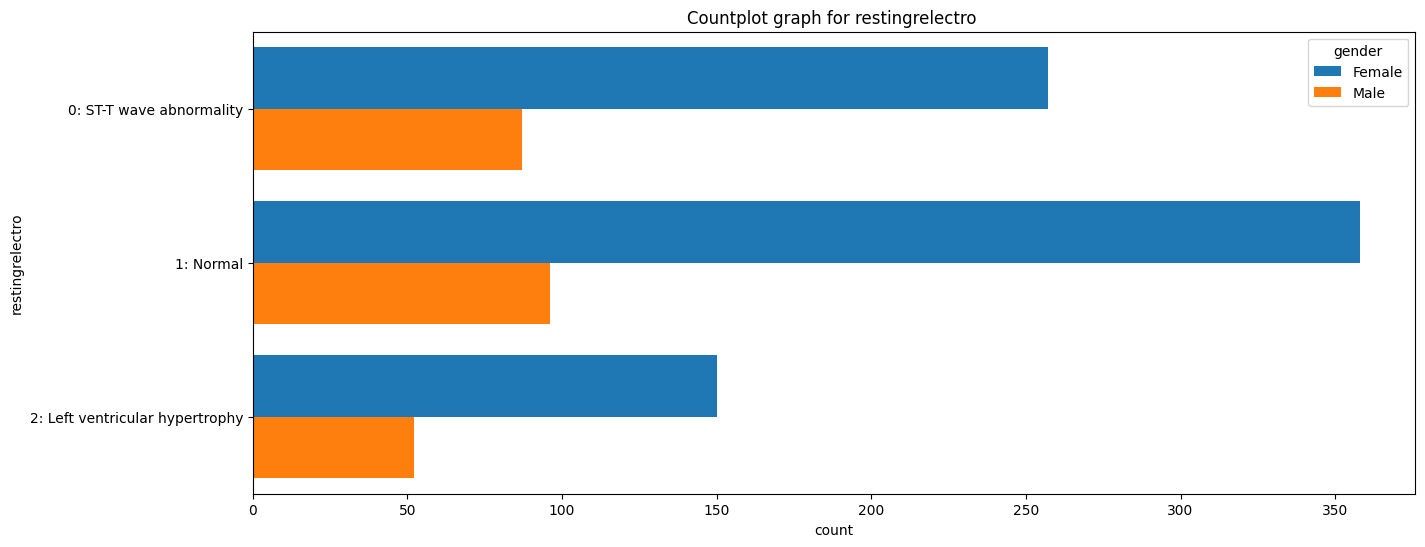

In [46]:
# prompt: plot for Resting electrocardiogram

countplot(data=df, column_y='restingrelectro', order=df['restingrelectro'].unique(), hue='gender', label_dict={0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'})


# Random Forrest Classification to predict Absence or Presence of Heart Disease¶

In [50]:
df.columns

Index(['ID', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [53]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['gender'].tail()

995    0
996    0
997    0
998    0
999    0
Name: gender, dtype: int64

In [54]:
x=df.iloc[:,1:13]
print(x)
y=df['target']
print(y)

     age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0     53       0          2        171                0                  0   
1     40       0          0         94              229                  0   
2     49       0          2        133              142                  0   
3     43       0          0        138              295                  1   
4     31       0          1        199                0                  0   
..   ...     ...        ...        ...              ...                ...   
995   48       0          2        139              349                  0   
996   47       0          3        143              258                  1   
997   69       0          0        156              434                  1   
998   45       0          1        186              417                  0   
999   25       0          0        158              270                  0   

     restingrelectro  maxheartrate  exerciseangia  oldpeak  slo

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier(n_estimators=100,criterion='entropy') # the number of decision trees
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [56]:
model.score(x_train, y_train)

1.0

In [57]:
model.score(x_test,y_test)

0.965

In [58]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 80,   7],
       [  0, 113]])

Text(145.72222222222223, 0.5, 'Truth')

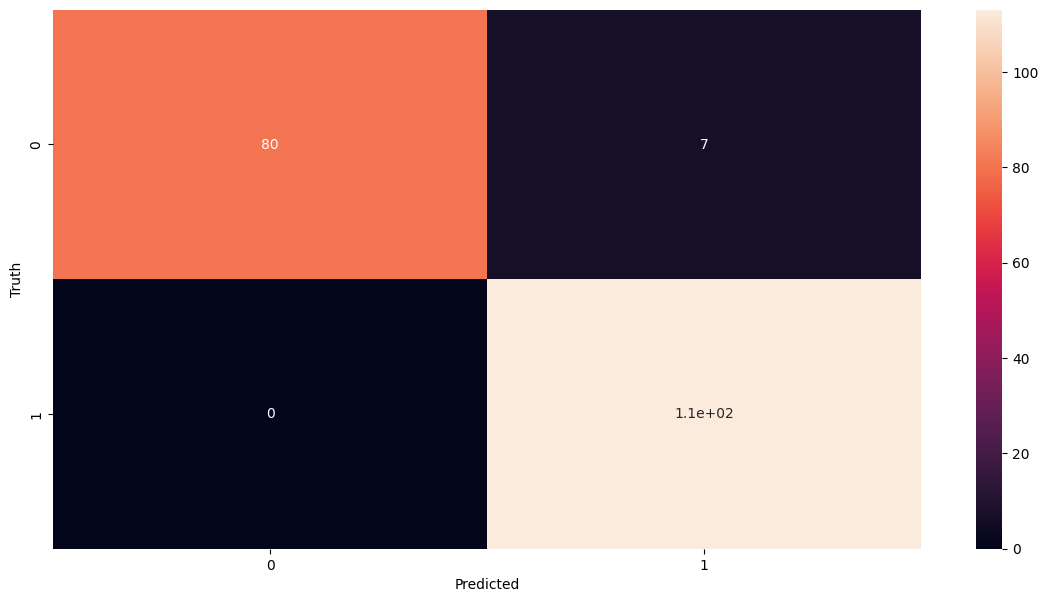

In [59]:
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
print(classification_report(y_test, y_predicted))
print(accuracy_score(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        87
           1       0.94      1.00      0.97       113

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

0.965
